#### Question 1. How much racial equity grant funding is given or pledged each year in Massachusetts

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

In [147]:
df = pd.read_csv('grants_given_years.csv')
df

,year,grants_given
0,2011,77900000
1,2012,95200000
2,2013,119500000
3,2014,119700000
4,2015,194300000
5,2016,203700000
6,2017,225900000
7,2018,236600000
8,2019,194100000
9,2020,159000000


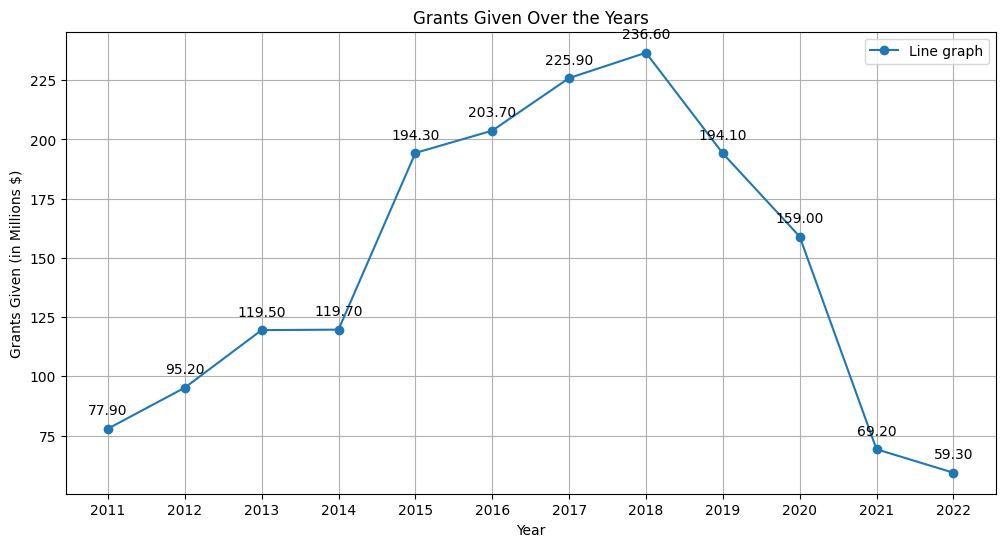

In [148]:
# Line graph with exact numbers
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['grants_given'] / 1e6, marker='o', linestyle='-', label='Line graph')
for i, txt in enumerate(df['grants_given'] / 1e6):
    plt.annotate(f'{txt:.2f}', (df['year'][i], df['grants_given'][i] / 1e6), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Grants Given Over the Years')
plt.xlabel('Year')
plt.ylabel('Grants Given (in Millions $)')
plt.grid(True)
plt.xticks(df['year'])
plt.legend()
plt.show()

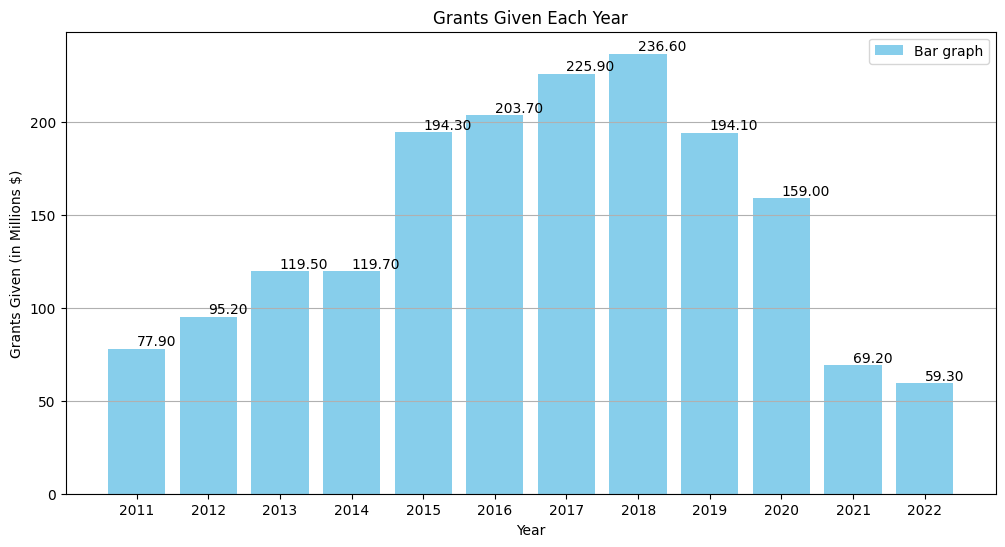

In [149]:
# Bar graph with exact numbers
plt.figure(figsize=(12, 6))
bars = plt.bar(df['year'], df['grants_given'] / 1e6, color='skyblue', label='Bar graph')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom')  # va: vertical alignment
plt.title('Grants Given Each Year')
plt.xlabel('Year')
plt.ylabel('Grants Given (in Millions $)')
plt.xticks(df['year'])
plt.grid(axis='y')
plt.legend()
plt.show()

In [6]:
grant = pd.read_csv('Combined_Grant_Details_2011_2023.csv')

# Filter any Not Available or Not Specified rows
words_to_filter = ['Not Available', 'Not Specified']
pattern = '|'.join(words_to_filter)
# grant = grant[~grant.apply(lambda row: row.astype(str).str.contains(pattern, case=False, regex=True).any(), axis=1)] # This filters any row that contains the words_to_filter
grant = grant[~grant['Grant Funder Name'].str.contains(pattern, case=False, na=False)]

grant

# Total of 34502 rows without filter
# Total of 32884 rows with filter

,Grant Funder Name,Grant Recipient Name,Grant Total Amount,Grant Fiscal Year,Grant Duration,Grant Program Area,Grant Primary Subject,Grant Population Served,Grant Support Strategy,Grant Transaction Type,Grant Description
0,"The TJX Foundation, Inc.","The Immigrant Learning Center, Inc.","3,000",2011,1 month,Not Specified,ESL and second language acquisition,Ethnic and racial groups; Immigrants; Refugees...,Not Specified,Cash grants,Not Specified
1,"Bank of America Charitable Foundation, Inc.",Summer Search Boston,"25,000",2011,1 month,Not Specified,Youth organizing,Adolescents; Ethnic and racial groups; Low-inc...,General support; Program support,Cash grants,For program and operating support
2,Barr Foundation,Beacon Academy Inc,"25,000",2011,1 month,Not Specified,Elementary and secondary education,Children and youth; Ethnic and racial groups; ...,Continuing support,Cash grants,Not Specified
3,"Boston Scientific Foundation, Inc.",Charles River Community Health,"25,000",2011,1 month,Not Specified,Health care clinics,Ethnic and racial groups; Unemployed people,Equal access; Program support,Cash grants,For Eliminating Health Disparities Program whi...
4,"Brookline Community Foundation, Inc.",Steps to Success,"25,000",2011,1 month,Not Specified,Education services,Children and youth; Ethnic and racial groups; ...,Program support,Cash grants,For discretionary - community
...,...,...,...,...,...,...,...,...,...,...,...
38626,Richard & Susan Smith Family Foundation,Young Man With a Plan (fiscal sponsor: The Pre...,"12,650",2022,1 year,Not Specified,Youth development,People of African descent; People of Latin Ame...,Equipment,Cash grants,"Capital grant for technology, furniture, and e..."
38627,Richard & Susan Smith Family Foundation,Steppingstone Foundation,"12,500",2022,1 year,Not Specified,College preparation,Researchers,Fundraising,Cash grants,Foundation Trustee discretionary matching gift
38628,Richard & Susan Smith Family Foundation,"Hyde Square Task Force, Inc.","10,000",2022,1 year,Not Specified,Education,Researchers,Fundraising,Cash grants,Foundation Trustee discretionary matching gift
38629,Seattle Foundation,Found in Translation,"10,000",2022,1 year,Not Specified,Information and Communications,Women; Ethnic and racial groups; Homeless peop...,Equal access; Translation,Cash grants,2022 F5 Tech for Good Grant.


In [8]:
# print(grant['Grant Fiscal Year'].unique())
print(len(grant['Grant Support Strategy'].unique()))

760


In [152]:
print(grant['Grant Transaction Type'].unique())

['Cash grants' 'Cash grants; Matching grants'
 'Cash grants; Employee matching gifts' 'In-kind gifts' 'Matching grants'
 'Officers and trustees discretionary grants' 'Not Specified'
 'Employee matching gifts'
 'Cash grants; Matching grants; Officers and trustees discretionary grants']


In [153]:
print(grant['Grant Population Served'].unique())

['Ethnic and racial groups; Immigrants; Refugees and displaced people; Low-income people; Students'
 'Adolescents; Ethnic and racial groups; Low-income people; Students'
 'Children and youth; Ethnic and racial groups; Economically disadvantaged people; Low-income people; Students'
 ...
 'Adolescents; Young adults; Ethnic and racial groups; Homeless people; Low-income people; At-risk youth'
 'Preteens; Adolescents; Economically disadvantaged people'
 'Gender and sexual identity; Ethnic and racial groups; Social and economic status']


#### Question 6: Who are the top funders of racial equity grants in Massachusetts for each year included in the data set (in terms of # of grants and dollar value) and how has this changed over time?

In [8]:
# In terms of # of grants
grant_counts = grant.groupby(['Grant Fiscal Year', 'Grant Funder Name']).size().reset_index(name='Number of Grants')

top_funders_by_year = grant_counts.groupby('Grant Fiscal Year').apply(lambda x: x.nlargest(5, 'Number of Grants')).reset_index(drop=True)

top_funders_by_year.to_csv('Top_Funders_by_Year.csv', index=False)

print(tabulate(top_funders_by_year, headers='keys', tablefmt='psql'))


+----+---------------------+----------------------------------------------------------+--------------------+
|    |   Grant Fiscal Year | Grant Funder Name                                        |   Number of Grants |
|----+---------------------+----------------------------------------------------------+--------------------|
|  0 |                2011 | The Boston Foundation                                    |                285 |
|  1 |                2011 | Barr Foundation                                          |                 80 |
|  2 |                2011 | Amelia Peabody Foundation                                |                 69 |
|  3 |                2011 | State Street Foundation, Inc.                            |                 65 |
|  4 |                2011 | Citizens Charitable Foundation                           |                 47 |
|  5 |                2012 | The Boston Foundation                                    |                312 |
|  6 |             

C:\Users\Woo Hyeon Her\AppData\Local\Temp\ipykernel_19424\2152170165.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_funders_by_year = grant_counts.groupby('Grant Fiscal Year').apply(lambda x: x.nlargest(5, 'Number of Grants')).reset_index(drop=True)


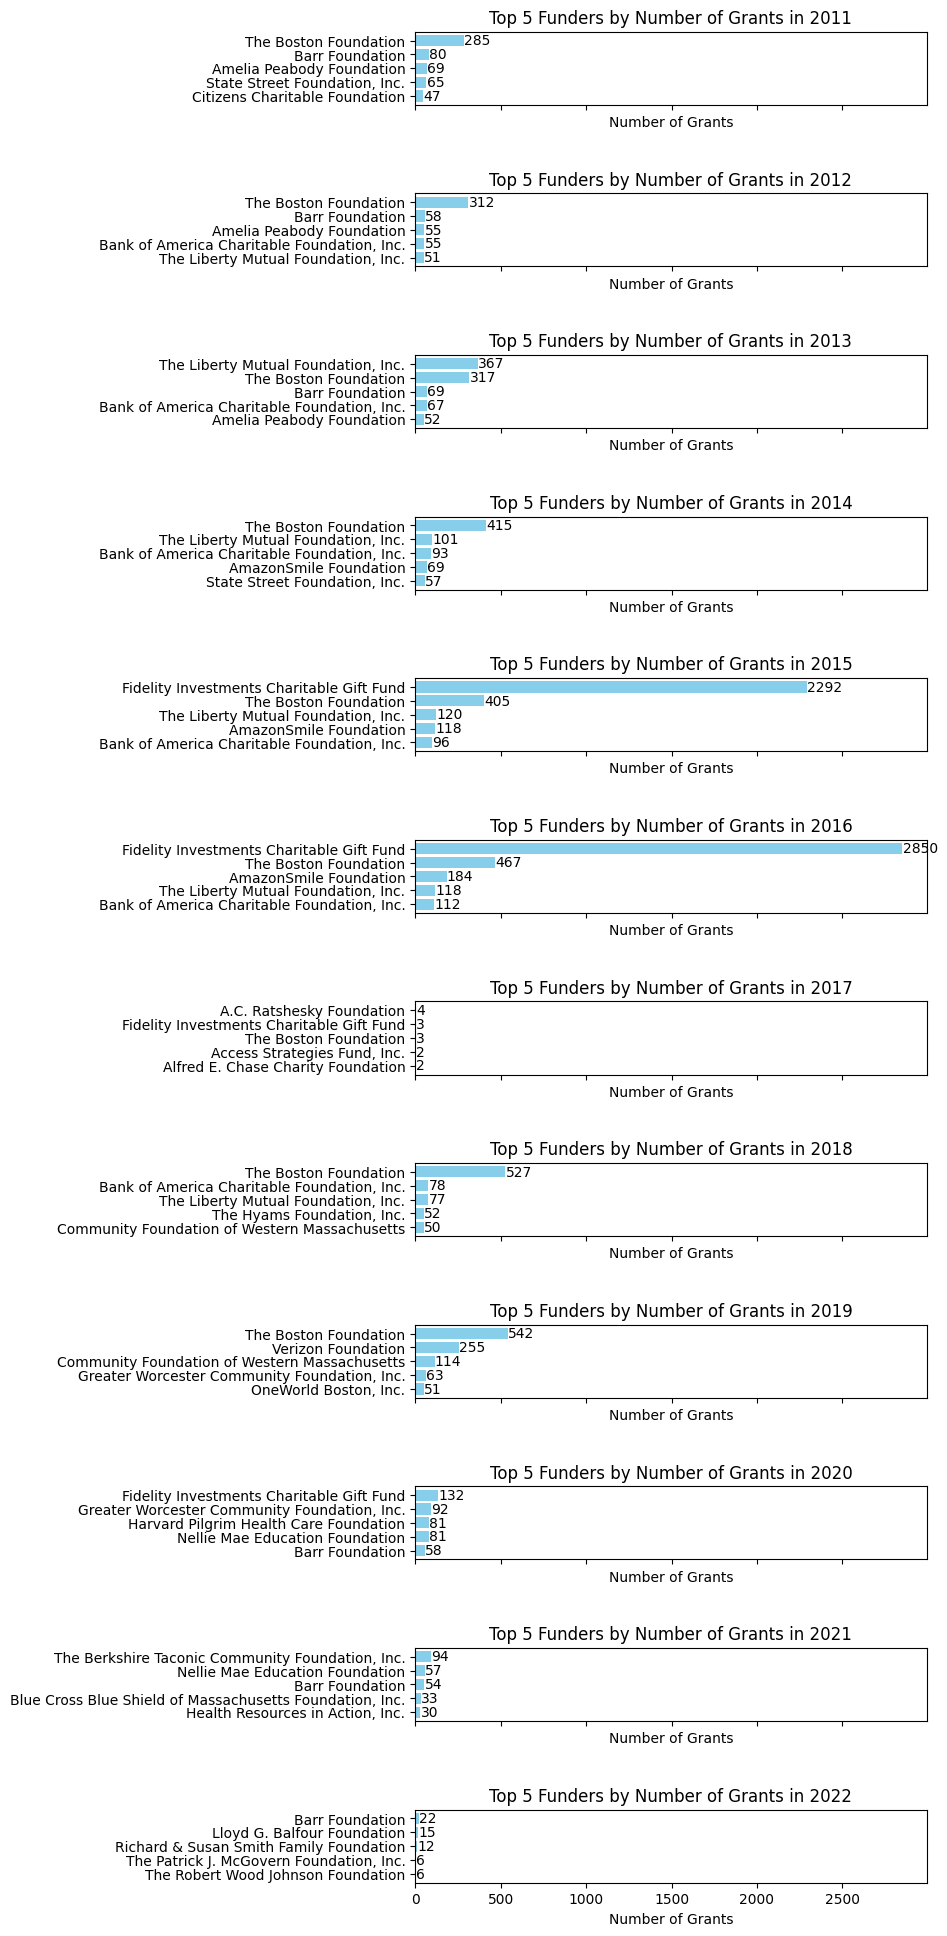

In [166]:
# Sort the data within each year group to ensure it's in order from highest to lowest
top_funders_by_year.sort_values(by=['Grant Fiscal Year', 'Number of Grants'], ascending=[True, False], inplace=True)

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=len(top_funders_by_year['Grant Fiscal Year'].unique()), figsize=(10, 20), sharex=True)

# Ensure axes is an array, even if there's only one year
axes = axes.flatten() if len(top_funders_by_year['Grant Fiscal Year'].unique()) > 1 else [axes]

# Loop through each year and plot data
for ax, (year, group) in zip(axes, top_funders_by_year.groupby('Grant Fiscal Year')):
    bars = ax.barh(group['Grant Funder Name'], group['Number of Grants'], color='skyblue')
    ax.set_title(f"Top 5 Funders by Number of Grants in {year}")
    ax.set_xlabel('Number of Grants')
    ax.invert_yaxis()  # Invert y-axis to have the funder with the most grants on top
    
    # Add text annotations to the bars
    for bar in bars:
        width = bar.get_width()
        label_x_pos = width + 2  # Adjust this value to move the label left or right
        ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, s=f'{width}', va='center')

# Add some spacing between plots
plt.tight_layout(pad=3.0)
# plt.savefig('Top 5 Funders by Number of Grants by Year.png')
plt.show()


In [9]:
# In terms of dollar value

# Convert 'Grant Total Amount' to numeric, forcing errors to NaN
grant['Grant Total Amount'] = pd.to_numeric(grant['Grant Total Amount'], errors='coerce')

# Fill NaN values with 0 to avoid errors when summing
grant['Grant Total Amount'].fillna(0, inplace=True)

# Group by year and funder name, then sum the grant amounts
grouped_data = grant.groupby(['Grant Fiscal Year', 'Grant Funder Name']).agg({
    'Grant Total Amount': 'sum'
}).reset_index()

# Get the top 5 funders by total grant amount for each year
top_funders_by_year = grouped_data.groupby('Grant Fiscal Year').apply(
    lambda x: x.nlargest(5, 'Grant Total Amount')
).reset_index(drop=True)

top_funders_by_year.to_csv('Top_Funders_by_Year_by_dollar.csv', index=False)

print(tabulate(top_funders_by_year, headers='keys', tablefmt='psql'))


+----+---------------------+------------------------------------------------------+----------------------+
|    |   Grant Fiscal Year | Grant Funder Name                                    |   Grant Total Amount |
|----+---------------------+------------------------------------------------------+----------------------|
|  0 |                2011 | Seattle Foundation                                   |                  750 |
|  1 |                2011 | Tides Foundation                                     |                  400 |
|  2 |                2011 | Horizons Foundation                                  |                  250 |
|  3 |                2011 | 1772 Foundation, Inc.                                |                    0 |
|  4 |                2011 | 3M Foundation                                        |                    0 |
|  5 |                2012 | Eastern Bank Foundation                              |                 4251 |
|  6 |                2012 | The Plym

C:\Users\Woo Hyeon Her\AppData\Local\Temp\ipykernel_19424\1154962770.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grant['Grant Total Amount'].fillna(0, inplace=True)
C:\Users\Woo Hyeon Her\AppData\Local\Temp\ipykernel_19424\1154962770.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the 

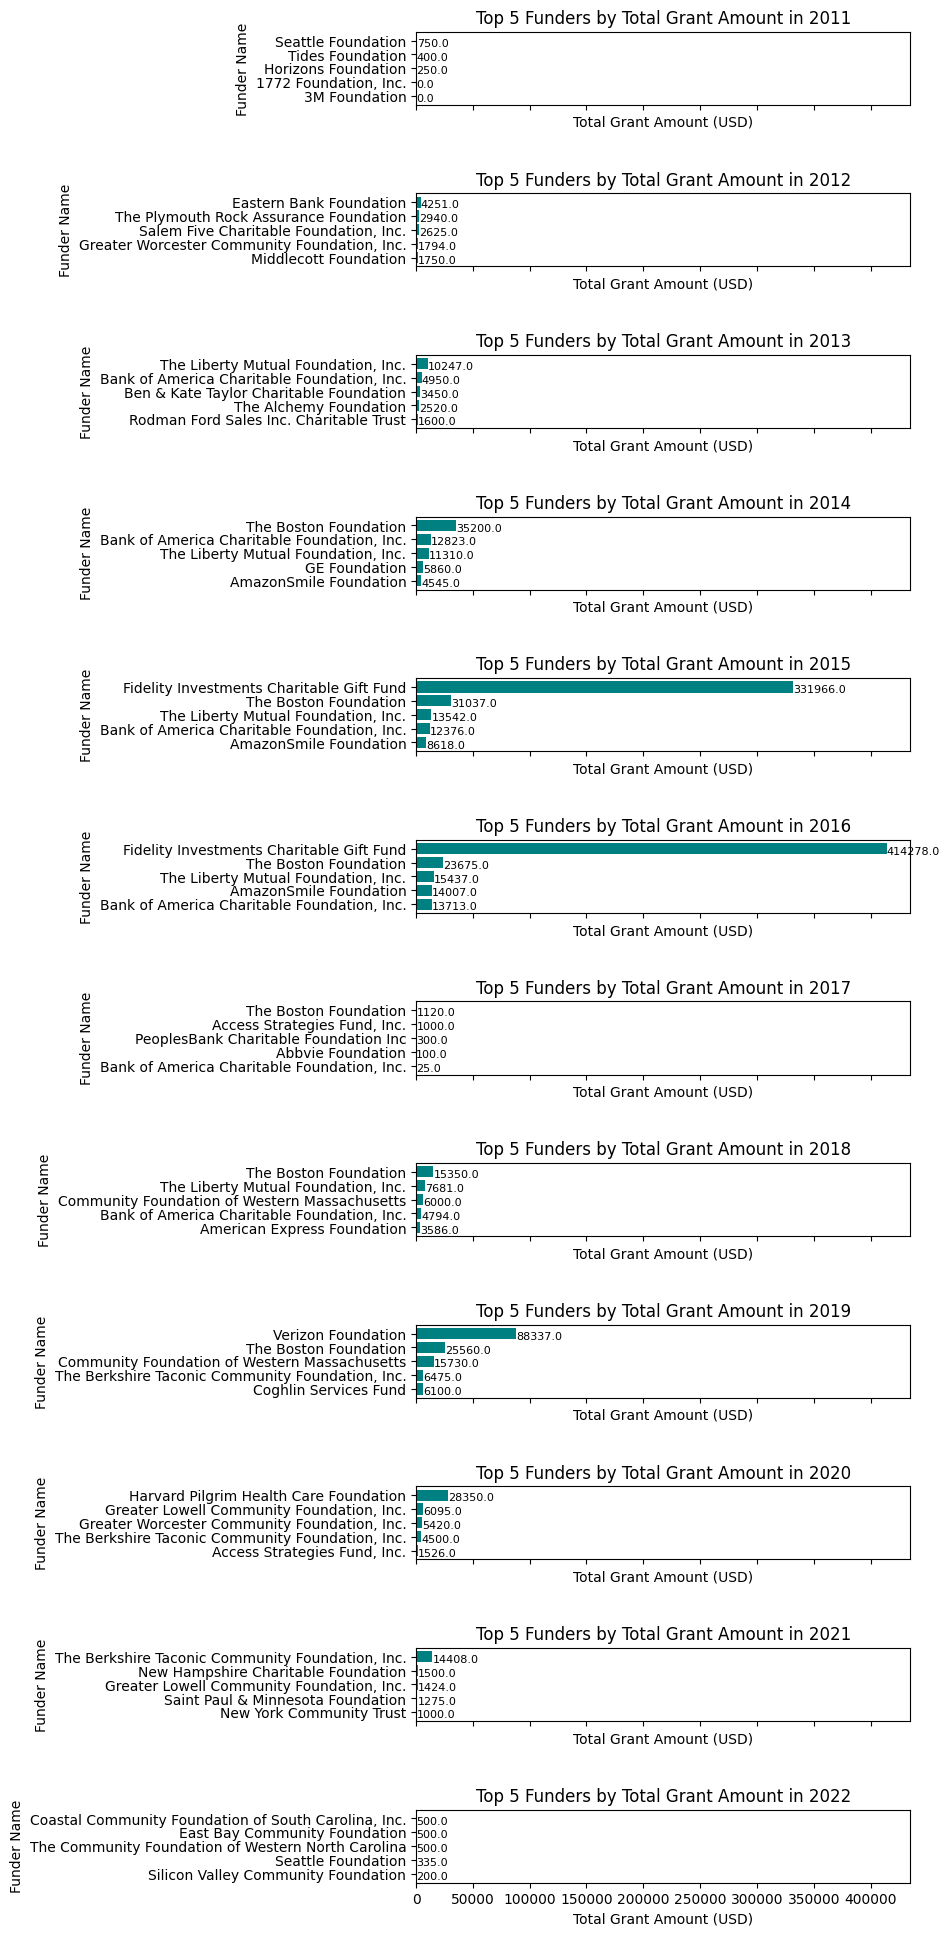

In [169]:
# Sort data to have it in descending order for better visualization
top_funders_by_year.sort_values(by=['Grant Fiscal Year', 'Grant Total Amount'], ascending=[True, False], inplace=True)

# Create a figure with subplots - one for each year
fig, axes = plt.subplots(nrows=len(top_funders_by_year['Grant Fiscal Year'].unique()), figsize=(10, 20), sharex=True)
axes = axes.flatten() if len(top_funders_by_year['Grant Fiscal Year'].unique()) > 1 else [axes]

# Plot each year's data
for ax, (year, group) in zip(axes, top_funders_by_year.groupby('Grant Fiscal Year')):
    ax.barh(group['Grant Funder Name'], group['Grant Total Amount'], color='teal')
    ax.set_title(f"Top 5 Funders by Total Grant Amount in {year}")
    ax.set_xlabel('Total Grant Amount (USD)')
    ax.set_ylabel('Funder Name')
    ax.invert_yaxis()  # To have the top granters appear at the top of the chart

    # Adding the data labels inside the bars
    for i in ax.patches:
        ax.text(i.get_width() + 1, i.get_y() + 0.8, \
                str(round((i.get_width()), 2)), fontsize=8, color='black')

# Adjust layout to prevent overlap
plt.tight_layout(pad=3.0)
# plt.savefig('Top 5 Funders by Total Grant Amount by Year.png')

plt.show()


#### Quesiton 7: Who are the top recipients of racial equity grants in Massachusetts (in terms of # of grants and dollar value) for each year and how has this changed over time?


In [10]:
# In terms of # of grants
grant_counts = grant.groupby(['Grant Fiscal Year', 'Grant Recipient Name']).size().reset_index(name='Number of Grants')

top_recipients_by_year = grant_counts.groupby('Grant Fiscal Year').apply(lambda x: x.nlargest(5, 'Number of Grants')).reset_index(drop=True)

top_recipients_by_year.to_csv('Top_Recipients_by_Year_by_number_of_grants.csv', index=False)

print(tabulate(top_recipients_by_year, headers='keys', tablefmt='psql'))


+----+---------------------+-----------------------------------------------------------------------------------+--------------------+
|    |   Grant Fiscal Year | Grant Recipient Name                                                              |   Number of Grants |
|----+---------------------+-----------------------------------------------------------------------------------+--------------------|
|  0 |                2011 | Year Up                                                                           |                 55 |
|  1 |                2011 | Building Educated Leaders for Life Foundation                                     |                 33 |
|  2 |                2011 | The Food Project                                                                  |                 33 |
|  3 |                2011 | Steppingstone Foundation                                                          |                 32 |
|  4 |                2011 | Jumpstart for Young Children     

C:\Users\Woo Hyeon Her\AppData\Local\Temp\ipykernel_19424\3116234273.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_recipients_by_year = grant_counts.groupby('Grant Fiscal Year').apply(lambda x: x.nlargest(5, 'Number of Grants')).reset_index(drop=True)


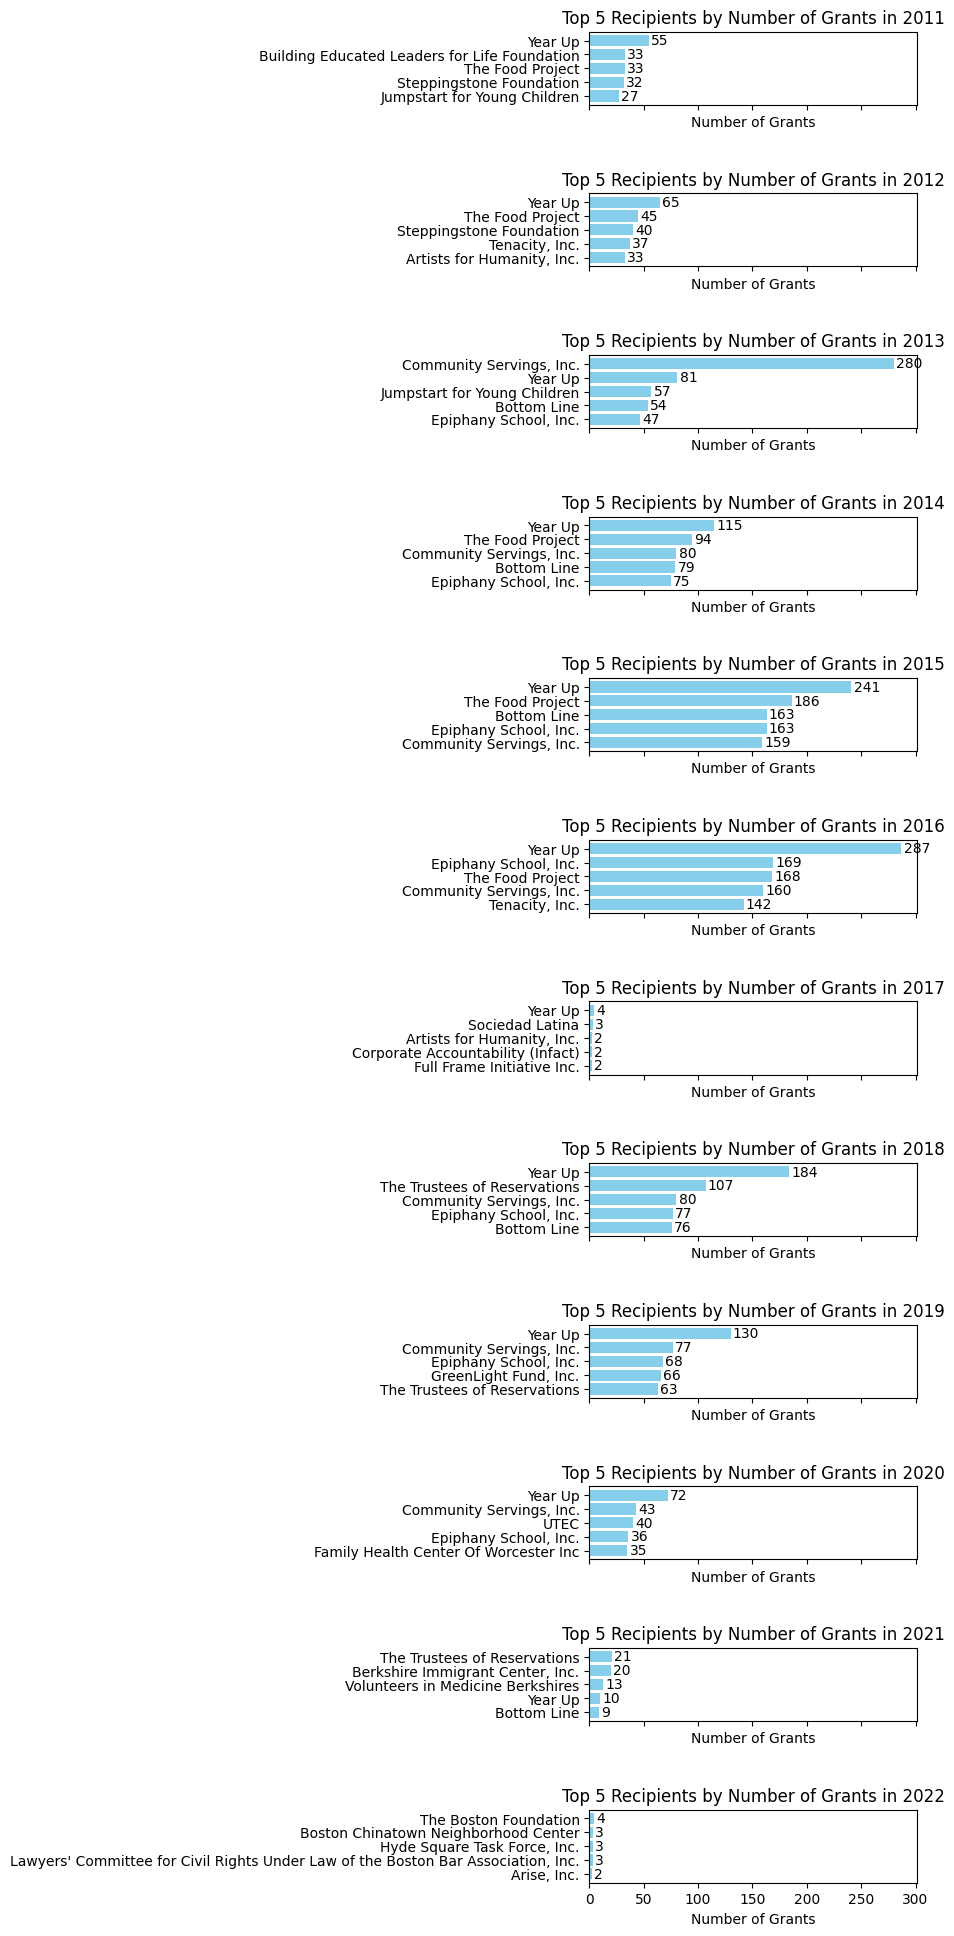

In [178]:
# Sort the data within each year group to ensure it's in order from highest to lowest
top_recipients_by_year.sort_values(by=['Grant Fiscal Year', 'Number of Grants'], ascending=[True, False], inplace=True)

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=len(top_recipients_by_year['Grant Fiscal Year'].unique()), figsize=(10, 20), sharex=True)

# Ensure axes is an array, even if there's only one year
axes = axes.flatten() if len(top_recipients_by_year['Grant Fiscal Year'].unique()) > 1 else [axes]

# Loop through each year and plot data
for ax, (year, group) in zip(axes, top_recipients_by_year.groupby('Grant Fiscal Year')):
    bars = ax.barh(group['Grant Recipient Name'], group['Number of Grants'], color='skyblue')
    ax.set_title(f"Top 5 Recipients by Number of Grants in {year}")
    ax.set_xlabel('Number of Grants')
    ax.invert_yaxis()  # Invert y-axis to have the funder with the most grants on top
    
    # Add text annotations to the bars
    for bar in bars:
        width = bar.get_width()
        label_x_pos = width + 2  # Adjust this value to move the label left or right
        ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, s=f'{width}', va='center')

# Add some spacing between plots
plt.tight_layout(pad=3.0)
plt.savefig('Top 5 Recipients by Total Number of Grants by Year.png')

plt.show()

In [11]:
# In terms of dollar value

# Convert 'Grant Total Amount' to numeric, forcing errors to NaN
grant['Grant Total Amount'] = pd.to_numeric(grant['Grant Total Amount'], errors='coerce')

# Fill NaN values with 0 to avoid errors when summing
grant['Grant Total Amount'].fillna(0, inplace=True)

# Group by year and funder name, then sum the grant amounts
grouped_data = grant.groupby(['Grant Fiscal Year', 'Grant Recipient Name']).agg({
    'Grant Total Amount': 'sum'
}).reset_index()

# Get the top 5 funders by total grant amount for each year
top_recipients_by_year = grouped_data.groupby('Grant Fiscal Year').apply(
    lambda x: x.nlargest(5, 'Grant Total Amount')
).reset_index(drop=True)

top_recipients_by_year.to_csv('Top_Recipients_by_Year_by_total_amount.csv', index=False)

print(tabulate(top_recipients_by_year, headers='keys', tablefmt='psql'))

+----+---------------------+-----------------------------------------------------------------------------------+----------------------+
|    |   Grant Fiscal Year | Grant Recipient Name                                                              |   Grant Total Amount |
|----+---------------------+-----------------------------------------------------------------------------------+----------------------|
|  0 |                2011 | United for a Fair Economy, Inc.                                                   |                  900 |
|  1 |                2011 | Epiphany School, Inc.                                                             |                  250 |
|  2 |                2011 | Unitarian Universalist Association                                                |                  250 |
|  3 |                2011 | 3rd Eye Youth Empowerment                                                         |                    0 |
|  4 |                2011 | A Better Chance Mas

C:\Users\Woo Hyeon Her\AppData\Local\Temp\ipykernel_19424\2599516366.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grant['Grant Total Amount'].fillna(0, inplace=True)
C:\Users\Woo Hyeon Her\AppData\Local\Temp\ipykernel_19424\2599516366.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the 

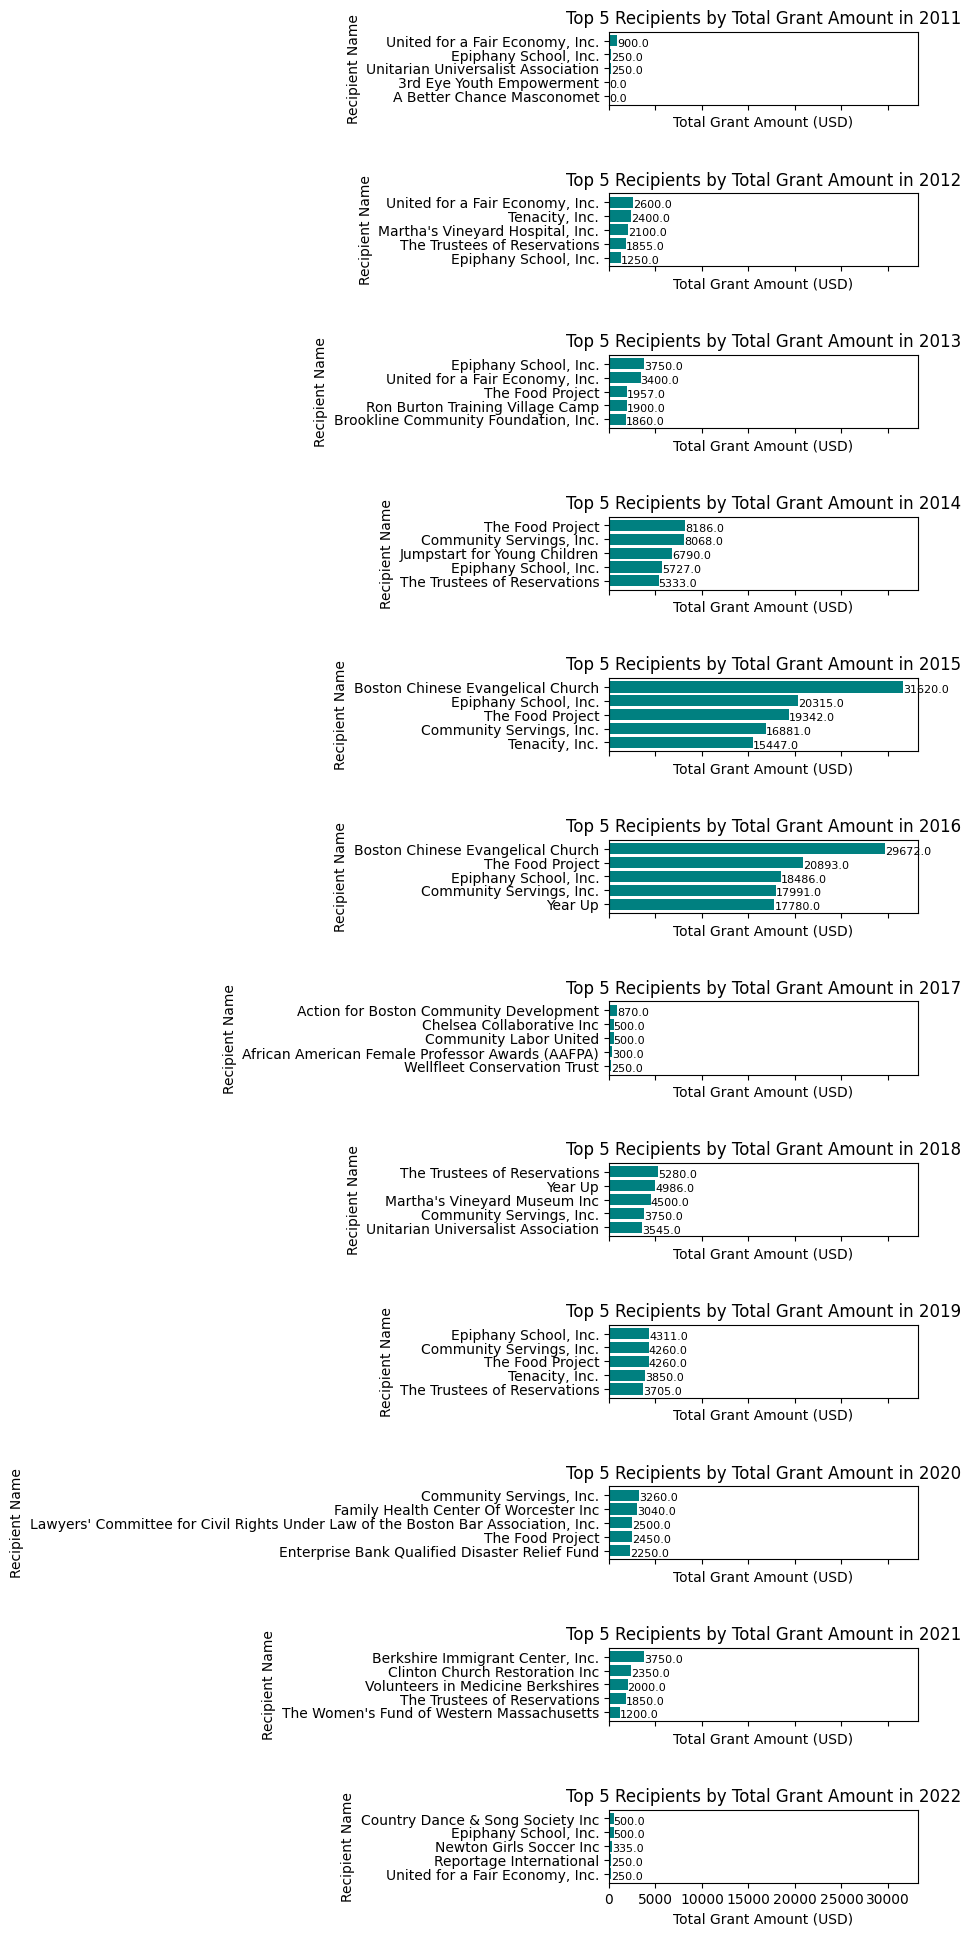

In [173]:
# Sort data to have it in descending order for better visualization
top_recipients_by_year.sort_values(by=['Grant Fiscal Year', 'Grant Total Amount'], ascending=[True, False], inplace=True)

# Create a figure with subplots - one for each year
fig, axes = plt.subplots(nrows=len(top_recipients_by_year['Grant Fiscal Year'].unique()), figsize=(10, 20), sharex=True)
axes = axes.flatten() if len(top_recipients_by_year['Grant Fiscal Year'].unique()) > 1 else [axes]

# Plot each year's data
for ax, (year, group) in zip(axes, top_recipients_by_year.groupby('Grant Fiscal Year')):
    ax.barh(group['Grant Recipient Name'], group['Grant Total Amount'], color='teal')
    ax.set_title(f"Top 5 Recipients by Total Grant Amount in {year}")
    ax.set_xlabel('Total Grant Amount (USD)')
    ax.set_ylabel('Recipient Name')
    ax.invert_yaxis()  # To have the top granters appear at the top of the chart


    # Adding the data labels inside the bars
    for i in ax.patches:
        ax.text(i.get_width() + 1, i.get_y() + 0.8, \
                str(round((i.get_width()), 2)), fontsize=8, color='black')

# Adjust layout to prevent overlap
plt.tight_layout(pad=3.0)
plt.savefig('Top 5 Recipients by Total Grant Amount by Year.png')

plt.show()


In [25]:
# Count the number of rows that contain the specific words in Grant Population Served
count_with_just_ethnic = grant[grant['Grant Population Served'].str.contains('Ethnic and racial groups', case=False)].shape[0]
print(f"Count of only ethinic is : {count_with_just_ethnic}")

count_indigenous = grant[grant['Grant Population Served'].str.contains('Indigenous peoples', case=False)].shape[0]
print(f"Count of only Indigenous is : {count_indigenous}")

count_alaskan = grant[grant['Grant Population Served'].str.contains('Alaskan Natives', case=False)].shape[0]
print(f"Count of only Alaskan is : {count_alaskan}")

count_american_indian = grant[grant['Grant Population Served'].str.contains('American Indians', case=False)].shape[0]
print(f"Count of only American Indian is : {count_american_indian}")

count_australian = grant[grant['Grant Population Served'].str.contains('Australian Aboriginal and Torres Strait Islander peoples', case=False)].shape[0]
print(f"Count of only Australian is : {count_australian}")

count_first_nation = grant[grant['Grant Population Served'].str.contains('First Nations of Canada', case=False)].shape[0]
print(f"Count of only First Nation is : {count_first_nation}")

count_hawaiian = grant[grant['Grant Population Served'].str.contains('Native Hawaiians', case=False)].shape[0]
print(f"Count of only Hawaiian is : {count_hawaiian}")

count_pacific = grant[grant['Grant Population Served'].str.contains('Pacific Islanders', case=False)].shape[0]
print(f"Count of only Pacific is : {count_pacific}")

count_african = grant[grant['Grant Population Served'].str.contains('People of African descent', case=False)].shape[0]
print(f"Count of only African is : {count_african}")

count_asian = grant[grant['Grant Population Served'].str.contains('People of Asian descent', case=False)].shape[0]
print(f"Count of only Asian is : {count_asian}")

count_central_asian = grant[grant['Grant Population Served'].str.contains('People of Central Asian descent', case=False)].shape[0]
print(f"Count of only Central Asian is : {count_central_asian}")

count_east_asian = grant[grant['Grant Population Served'].str.contains('People of East Asian descent', case=False)].shape[0]
print(f"Count of only East Asian is : {count_east_asian}")

count_south_asian = grant[grant['Grant Population Served'].str.contains('People of South Asian descent', case=False)].shape[0]
print(f"Count of only South Asian is : {count_south_asian}")

count_southeast_asian = grant[grant['Grant Population Served'].str.contains('People of Southeast Asian descent', case=False)].shape[0]
print(f"Count of only Southeast Asian is : {count_southeast_asian}")

count_latin_american = grant[grant['Grant Population Served'].str.contains('People of Latin American descent', case=False)].shape[0]
print(f"Count of only Latin American is : {count_latin_american}")

count_caribbean = grant[grant['Grant Population Served'].str.contains('People of Caribbean descent', case=False)].shape[0]
print(f"Count of only Caribbean is : {count_caribbean}")

count_central = grant[grant['Grant Population Served'].str.contains('People of Central American descent', case=False)].shape[0]
print(f"Count of only Central is : {count_central}")

count_south = grant[grant['Grant Population Served'].str.contains('People of South American descent', case=False)].shape[0]
print(f"Count of only South is : {count_south}")

grant.shape[0]
print(f"Total number of rows in the dataset is : {grant.shape[0]}")

sum_of_count = count_central_asian + count_african + count_alaskan + count_american_indian + count_asian + count_australian + count_caribbean + count_central + count_east_asian + count_first_nation + count_hawaiian + count_indigenous + count_latin_american + count_pacific + count_south + count_south_asian + count_southeast_asian + count_with_just_ethnic
print(f"The sum of all the counts is : {sum_of_count}")


Count of only ethinic is : 23748
Count of only Indigenous is : 787
Count of only Alaskan is : 11
Count of only American Indian is : 296
Count of only Australian is : 1
Count of only First Nation is : 0
Count of only Hawaiian is : 4
Count of only Pacific is : 2
Count of only African is : 2330
Count of only Asian is : 637
Count of only Central Asian is : 0
Count of only East Asian is : 1004
Count of only South Asian is : 53
Count of only Southeast Asian is : 187
Count of only Latin American is : 1864
Count of only Caribbean is : 4
Count of only Central is : 1
Count of only South is : 3
Total number of rows in the dataset is : 37068
The sum of all the counts is : 30932


In [59]:
ethnicity = ['Ethnic and racial groups', 
             'Indigenous peoples', 'Alaskan Natives', 'American Indians', 'Australian Aboriginal and Torres Strait Islander peoples', 'First Nations of Canada', 'Native Hawaiians', 'Pacific Islanders',
             'People of African descent',
             'People of Asian descent', 'People of Central Asian descent', 'People of East Asian descent', 'People of South Asian descent', 'People of Southeast Asian descent',
             'People of Latin American descent', 'People of Caribbean descent', 'People of Central American descent', 'People of South American descent'
]

grant['Grant Total Amount'] = grant['Grant Total Amount'].replace('[\$,]', '', regex=True).astype(float)



data_list = []
sum_of_percent_total_row = 0
# sum_of_percent_sum_of_count = 0
sum_of_total_grant = grant['Grant Total Amount'].sum()
grant_sum = 0
grant_percent = 0

for race in ethnicity:
    # Filter the DataFrame for the current race
    race_data = grant[grant['Grant Population Served'].str.contains(race, case=False, na=False)]
    # Calculate the count of rows and sum of grant amounts
    count = race_data.shape[0]
    total_grant = race_data['Grant Total Amount'].sum()

    # Calculate the percentage of the total number of rows and the sum of the count
    percentage_total_row = (count / grant.shape[0]) * 100
    percentage_sum_of_count = (count / sum_of_count) * 100
    percentage_grant = (total_grant / sum_of_total_grant) * 100
    sum_of_percent_total_row += percentage_total_row
    # sum_of_percent_sum_of_count += percentage_sum_of_count
    grant_sum += total_grant
    grant_percent += percentage_grant



    # Append the result as a dictionary to the data_list
    data_list.append({'Ethnicity': race, 
                      'Count': count, 
                      'Percentage based on Total Number of Rows': percentage_total_row, 
                    #   'Percentage based on Sum of Count': percentage_sum_of_count,
                      'Total Grant Amount': total_grant,
                      'Percentage of Total Grant Amount': percentage_grant})
data_list.append({'Ethnicity': 'Sums', 
                  'Count': sum_of_count, 
                  'Percentage based on Total Number of Rows': sum_of_percent_total_row, 
                #   'Percentage based on Sum of Count': sum_of_percent_sum_of_count,
                  'Total Grant Amount': grant_sum,
                  'Percentage of Total Grant Amount': grant_percent})


ethnicity_counts = pd.DataFrame(data_list).round(3)
ethnicity_counts

# ethnicity_counts.to_csv('Ethnicity_and_grants.csv', index=False)


,Ethnicity,Count,Percentage based on Total Number of Rows,Total Grant Amount,Percentage of Total Grant Amount
0,Ethnic and racial groups,23748,64.066,1415494.0,68.202
1,Indigenous peoples,787,2.123,67000.0,3.228
2,Alaskan Natives,11,0.030,0.0,0.000
3,American Indians,296,0.799,22748.0,1.096
4,Australian Aboriginal and Torres Strait Island...,1,0.003,0.0,0.000
5,First Nations of Canada,0,0.000,0.0,0.000
6,Native Hawaiians,4,0.011,0.0,0.000
7,Pacific Islanders,2,0.005,0.0,0.000
8,People of African descent,2330,6.286,121845.0,5.871
9,People of Asian descent,637,1.718,34277.0,1.652


C:\Users\Woo Hyeon Her\AppData\Local\Temp\ipykernel_19424\1413073449.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Ethnicity', data=ethnicity_counts[:-1], ax=ax[0], palette='viridis')  # Exclude the last sum row
C:\Users\Woo Hyeon Her\AppData\Local\Temp\ipykernel_19424\1413073449.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Grant Amount', y='Ethnicity', data=ethnicity_counts[:-1], ax=ax[1], palette='viridis')


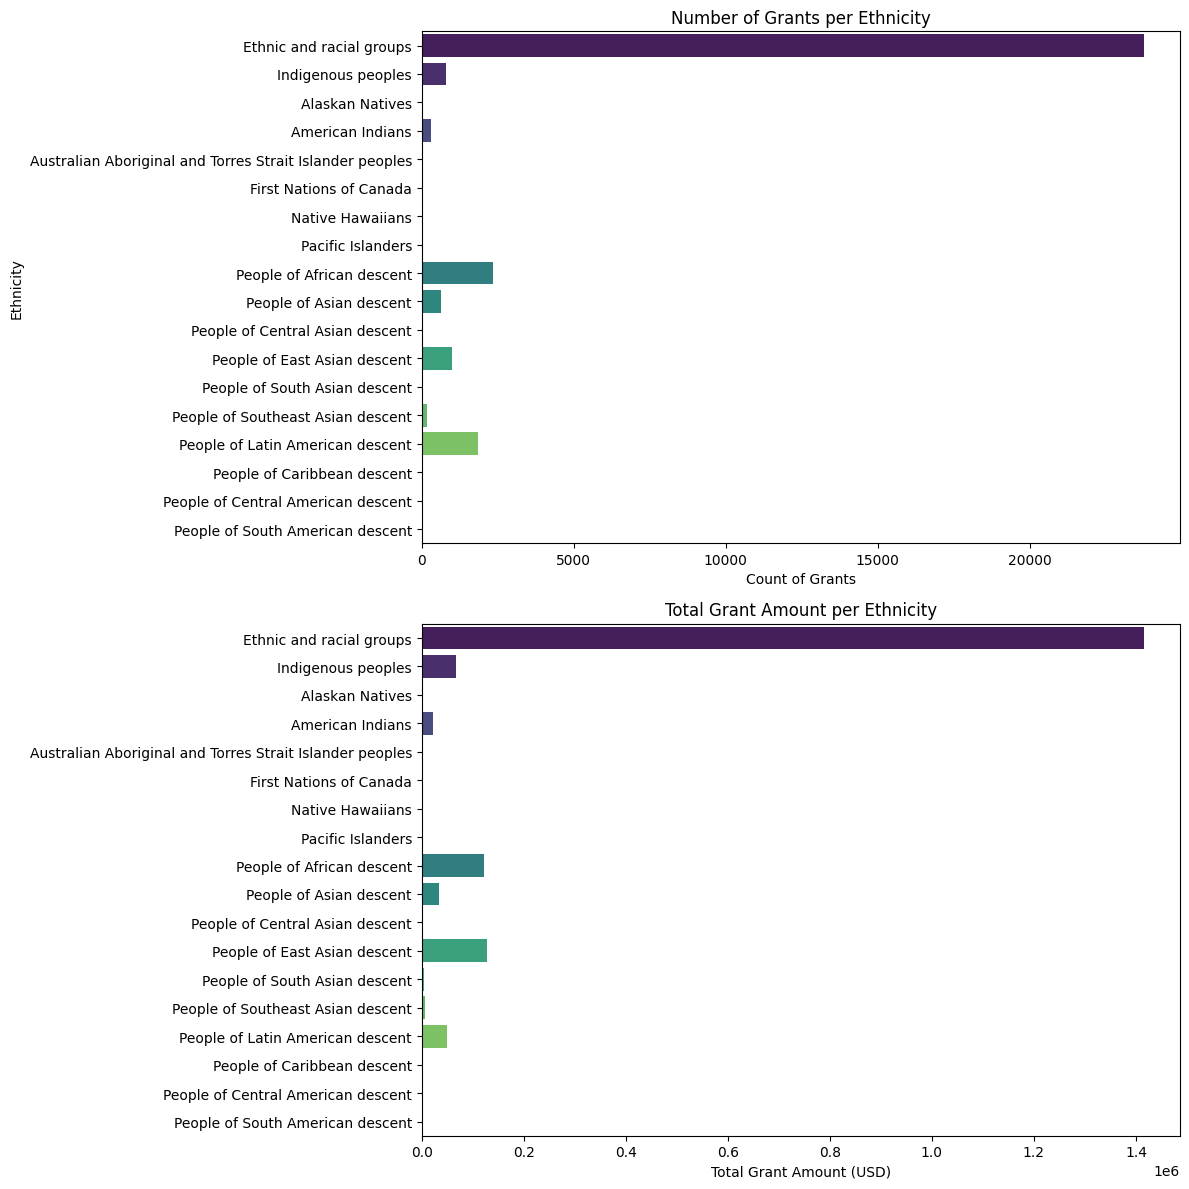

In [62]:
# Create a figure with subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 12))  # 2 rows, 1 column

# Bar chart for counts
sns.barplot(x='Count', y='Ethnicity', data=ethnicity_counts[:-1], ax=ax[0], palette='viridis')  # Exclude the last sum row
ax[0].set_title('Number of Grants per Ethnicity')
ax[0].set_xlabel('Count of Grants')
ax[0].set_ylabel('Ethnicity')

# Bar chart for total grant amounts
sns.barplot(x='Total Grant Amount', y='Ethnicity', data=ethnicity_counts[:-1], ax=ax[1], palette='viridis')
ax[1].set_title('Total Grant Amount per Ethnicity')
ax[1].set_xlabel('Total Grant Amount (USD)')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()


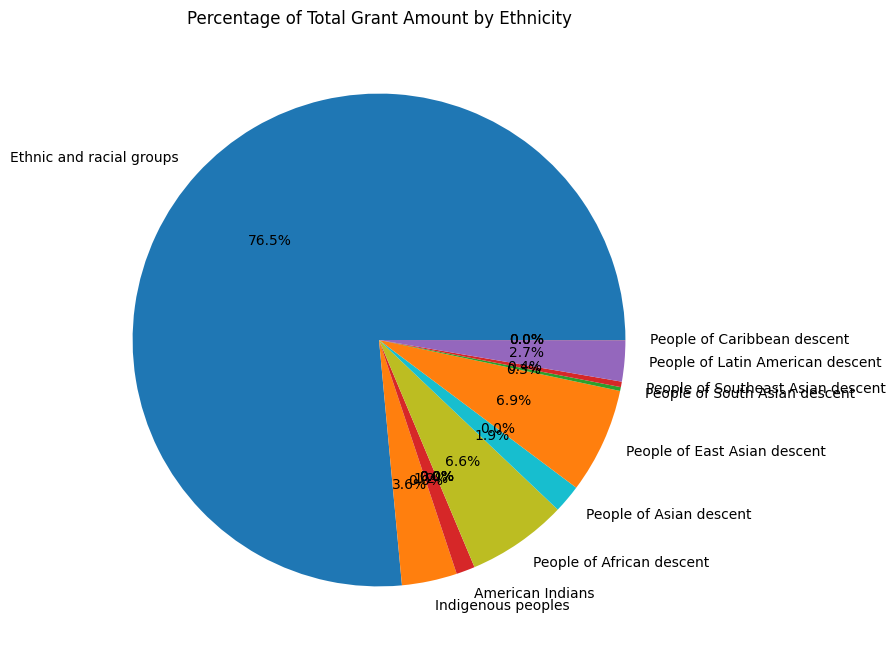

In [63]:
# Pie chart for percentage of total grant amounts
fig, ax = plt.subplots(figsize=(8, 8))
ethnicity_counts[:-1].set_index('Ethnicity')['Percentage of Total Grant Amount'].plot(kind='pie', autopct='%1.1f%%', ax=ax)
ax.set_ylabel('')
ax.set_title('Percentage of Total Grant Amount by Ethnicity')

plt.show()
